In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import *
%matplotlib inline

In [42]:
def test_k_values(kMax,data):
    # test performance with k clusters from 1 upto kMax
    clusterDistributionList = []
    inertiaList = []
    for k in tqdm(range(1,kMax+1)):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertiaList.append(kmeans.inertia_)
        clusterDistribution = []
        for i in range(k):
            clusterDistribution.append(len(np.where(kmeans.labels_ == i)[0]))
        clusterDistributionList.append(clusterDistribution)
    return clusterDistributionList, inertiaList

In [71]:
def plot_outcome(kMax, clusterDistributionList, inertiaList,elbowNum):
    plt.figure()
    plt.plot(range(1,kMax+1),inertiaList)
#     elbowNum = 6
    annotation = 'elbow point:',elbowNum
    plt.annotate(annotation, xy=(elbowNum, inertiaList[elbowNum-1]), xytext=(elbowNum, inertiaList[elbowNum-2]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.figure(figsize=(50, 50))
    plt.subplots_adjust(hspace=.5)
    for k in tqdm(range(1,kMax+1)):
        plt.subplot(4, 5, k)
        plt.bar(range(1, k + 1), clusterDistributionList[k - 1])
        plt.title('K = ' + str(k))

In [81]:
def loadList(filepath):
    lineList = []
    with open(filepath,"r") as fl:
        for line in fl:
            lineList.append(line)
    return lineList

In [82]:
def find_10_nearest_data(kmeans,dataFile,lineList,clusterInd):
    labelList = kmeans.labels_
    indexCluster = np.where(labelList == clusterInd)[0] #find the indexes of cluster 1
    distances = kmeans.transform(dataFile)
    distCluster = distances[indexCluster,clusterInd] #find the distances between data in the cluster and the center of cluster
    nIndexCluster = np.argsort(distCluster)[:-11:-1] #find the index in the cluster list of the 10 nearest ones
    nIndex = indexCluster[nIndexCluster] #find the index in the whole list
    
    print('For cluster',clusterInd+1,'\\\\\n ','\\begin{itemize}') #for easy documentation in Latex
    for index in nIndex:
        print('\item ',lineList[index]) #print the associate titles
    print('\end{itemize}')

# Load Data

In [84]:
science2kdocword = np.load("./science2k-doc-word.npy")
science2kworddoc = np.load("./science2k-word-doc.npy")
titleList = loadList("./science2k-titles.txt")
termList = loadList("./science2k-vocab.txt")

# documents analysis
### test on different cluster numbers

In [44]:
clusterDistributionList, inertiaList = test_k_values(20, science2kdocword)

100%|██████████| 20/20 [02:40<00:00,  8.03s/it]


100%|██████████| 20/20 [00:01<00:00, 11.36it/s]


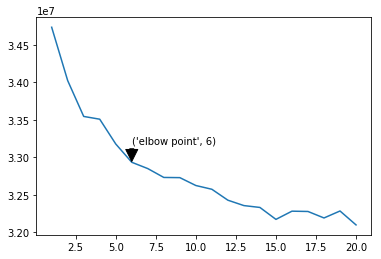

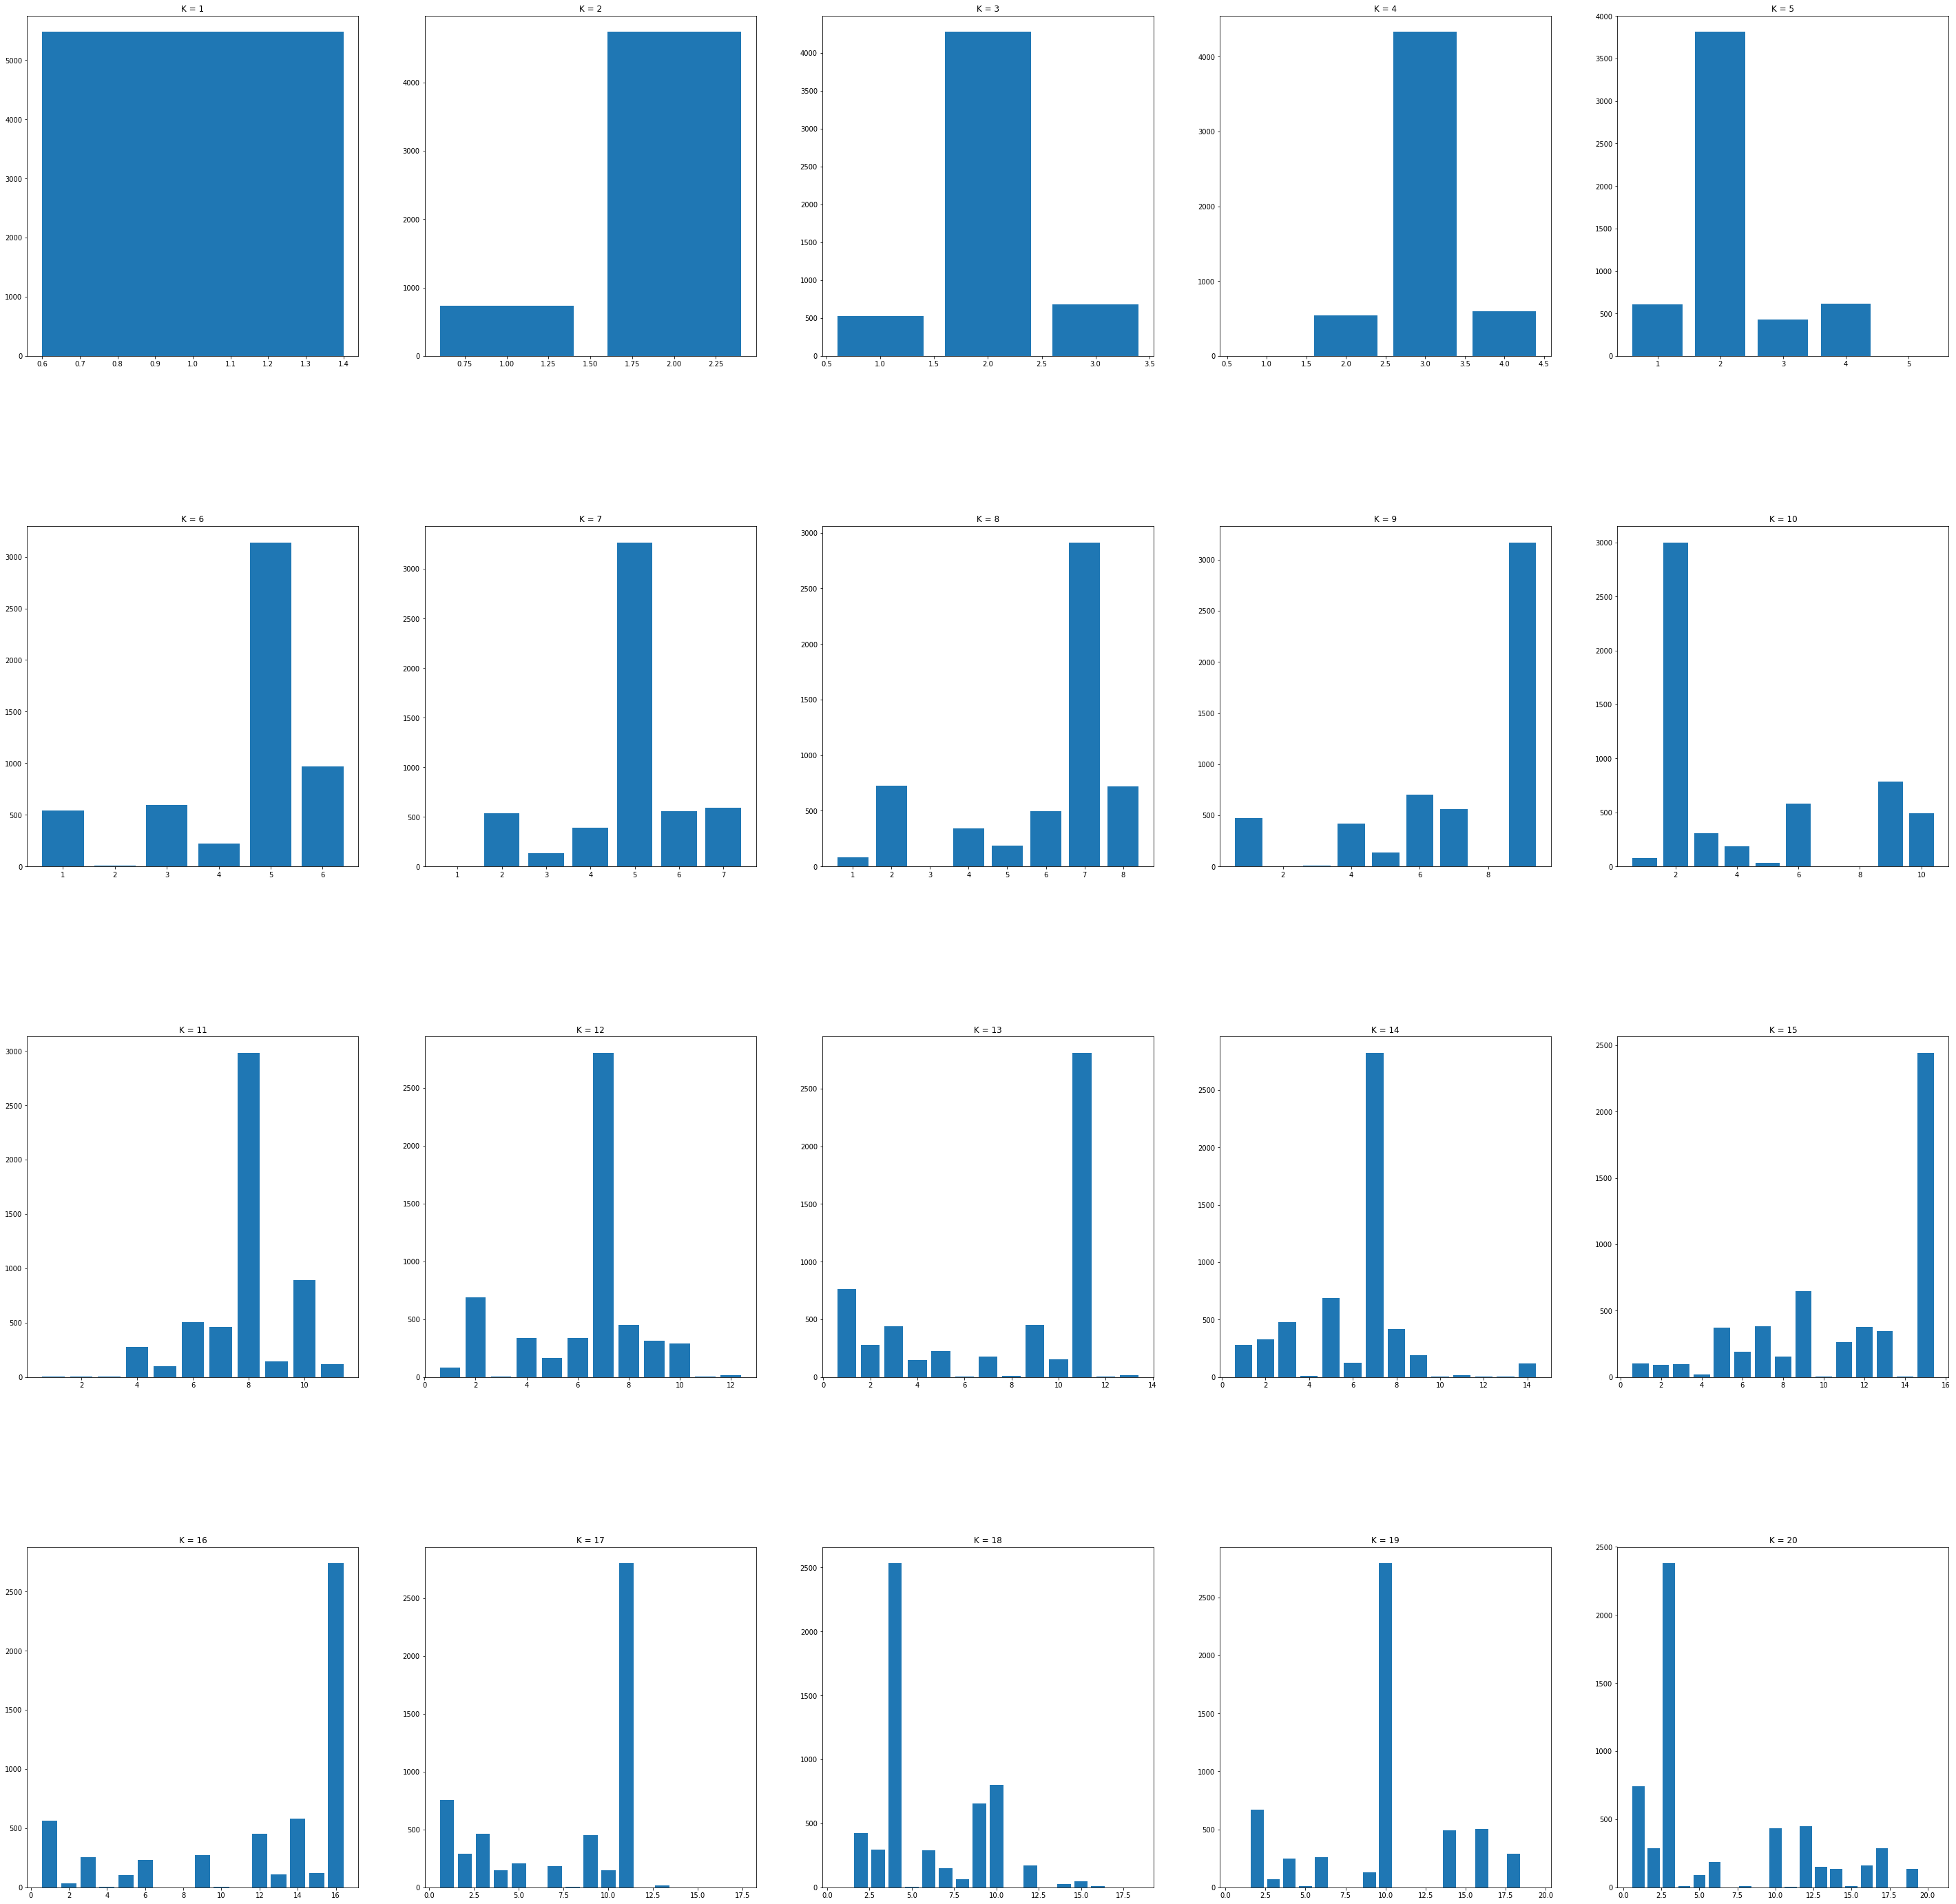

In [74]:
elbowNumDoc = 6
plot_outcome(20,clusterDistributionList,inertiaList,elbowNumDoc)

### Clustering and find 10 representative data in each cluster

In [69]:
clusterNum = 6
kmeans = KMeans(n_clusters= clusterNum, random_state=0).fit(science2kdocword)
for ind in range(clusterNum):
    find_10_nearest_data(kmeans,science2kdocword,titleList,ind)

For cluster 1 \\
  \begin{itemize}
\item  "The Ascent of Atmospheric Sciences"

\item  "Status and Improvements of Coupled General Circulation Models"

\item  "Piecing Together the Biggest Puzzle of All"

\item  "Sedimentary Rocks of Early Mars"

\item  "Climate Extremes: Observations, Modeling, and Impacts"

\item  "Planetary Science: A Space Odyssey"

\item  "Subduction and Slab Detachment in the Mediterranean-Carpathian Region"

\item  "One Hundred Years of Quantum Physics"

\item  "The Formation and Early Evolution of the Milky Way Galaxy"

\item  "Earth's Core and the Geodynamo"

\end{itemize}
For cluster 2 \\
  \begin{itemize}
\item  "Atom-Scale Research Gets Real"

\item  "Breakthrough of the Year: Genomics Comes of Age"

\item  "Infectious History"

\item  "A Mouse Chronology"

\item  "Genomics: Journey to the Center of Biology"

\item  "Designing a New Material World"

\item  "Deconstructing the Science Wars by Reconstructing an Old Mold"

\item  "Meltdown on Long Island"

\it

# Term analysis
### test on different cluster numbers

In [70]:
clusterDistributionList, inertiaList = test_k_values(20, science2kworddoc)

100%|██████████| 20/20 [03:00<00:00,  9.03s/it]


100%|██████████| 20/20 [00:01<00:00, 11.69it/s]


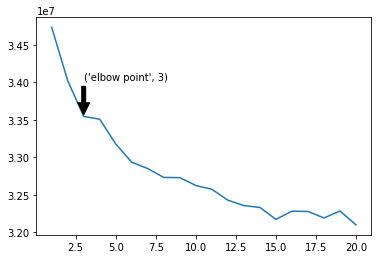

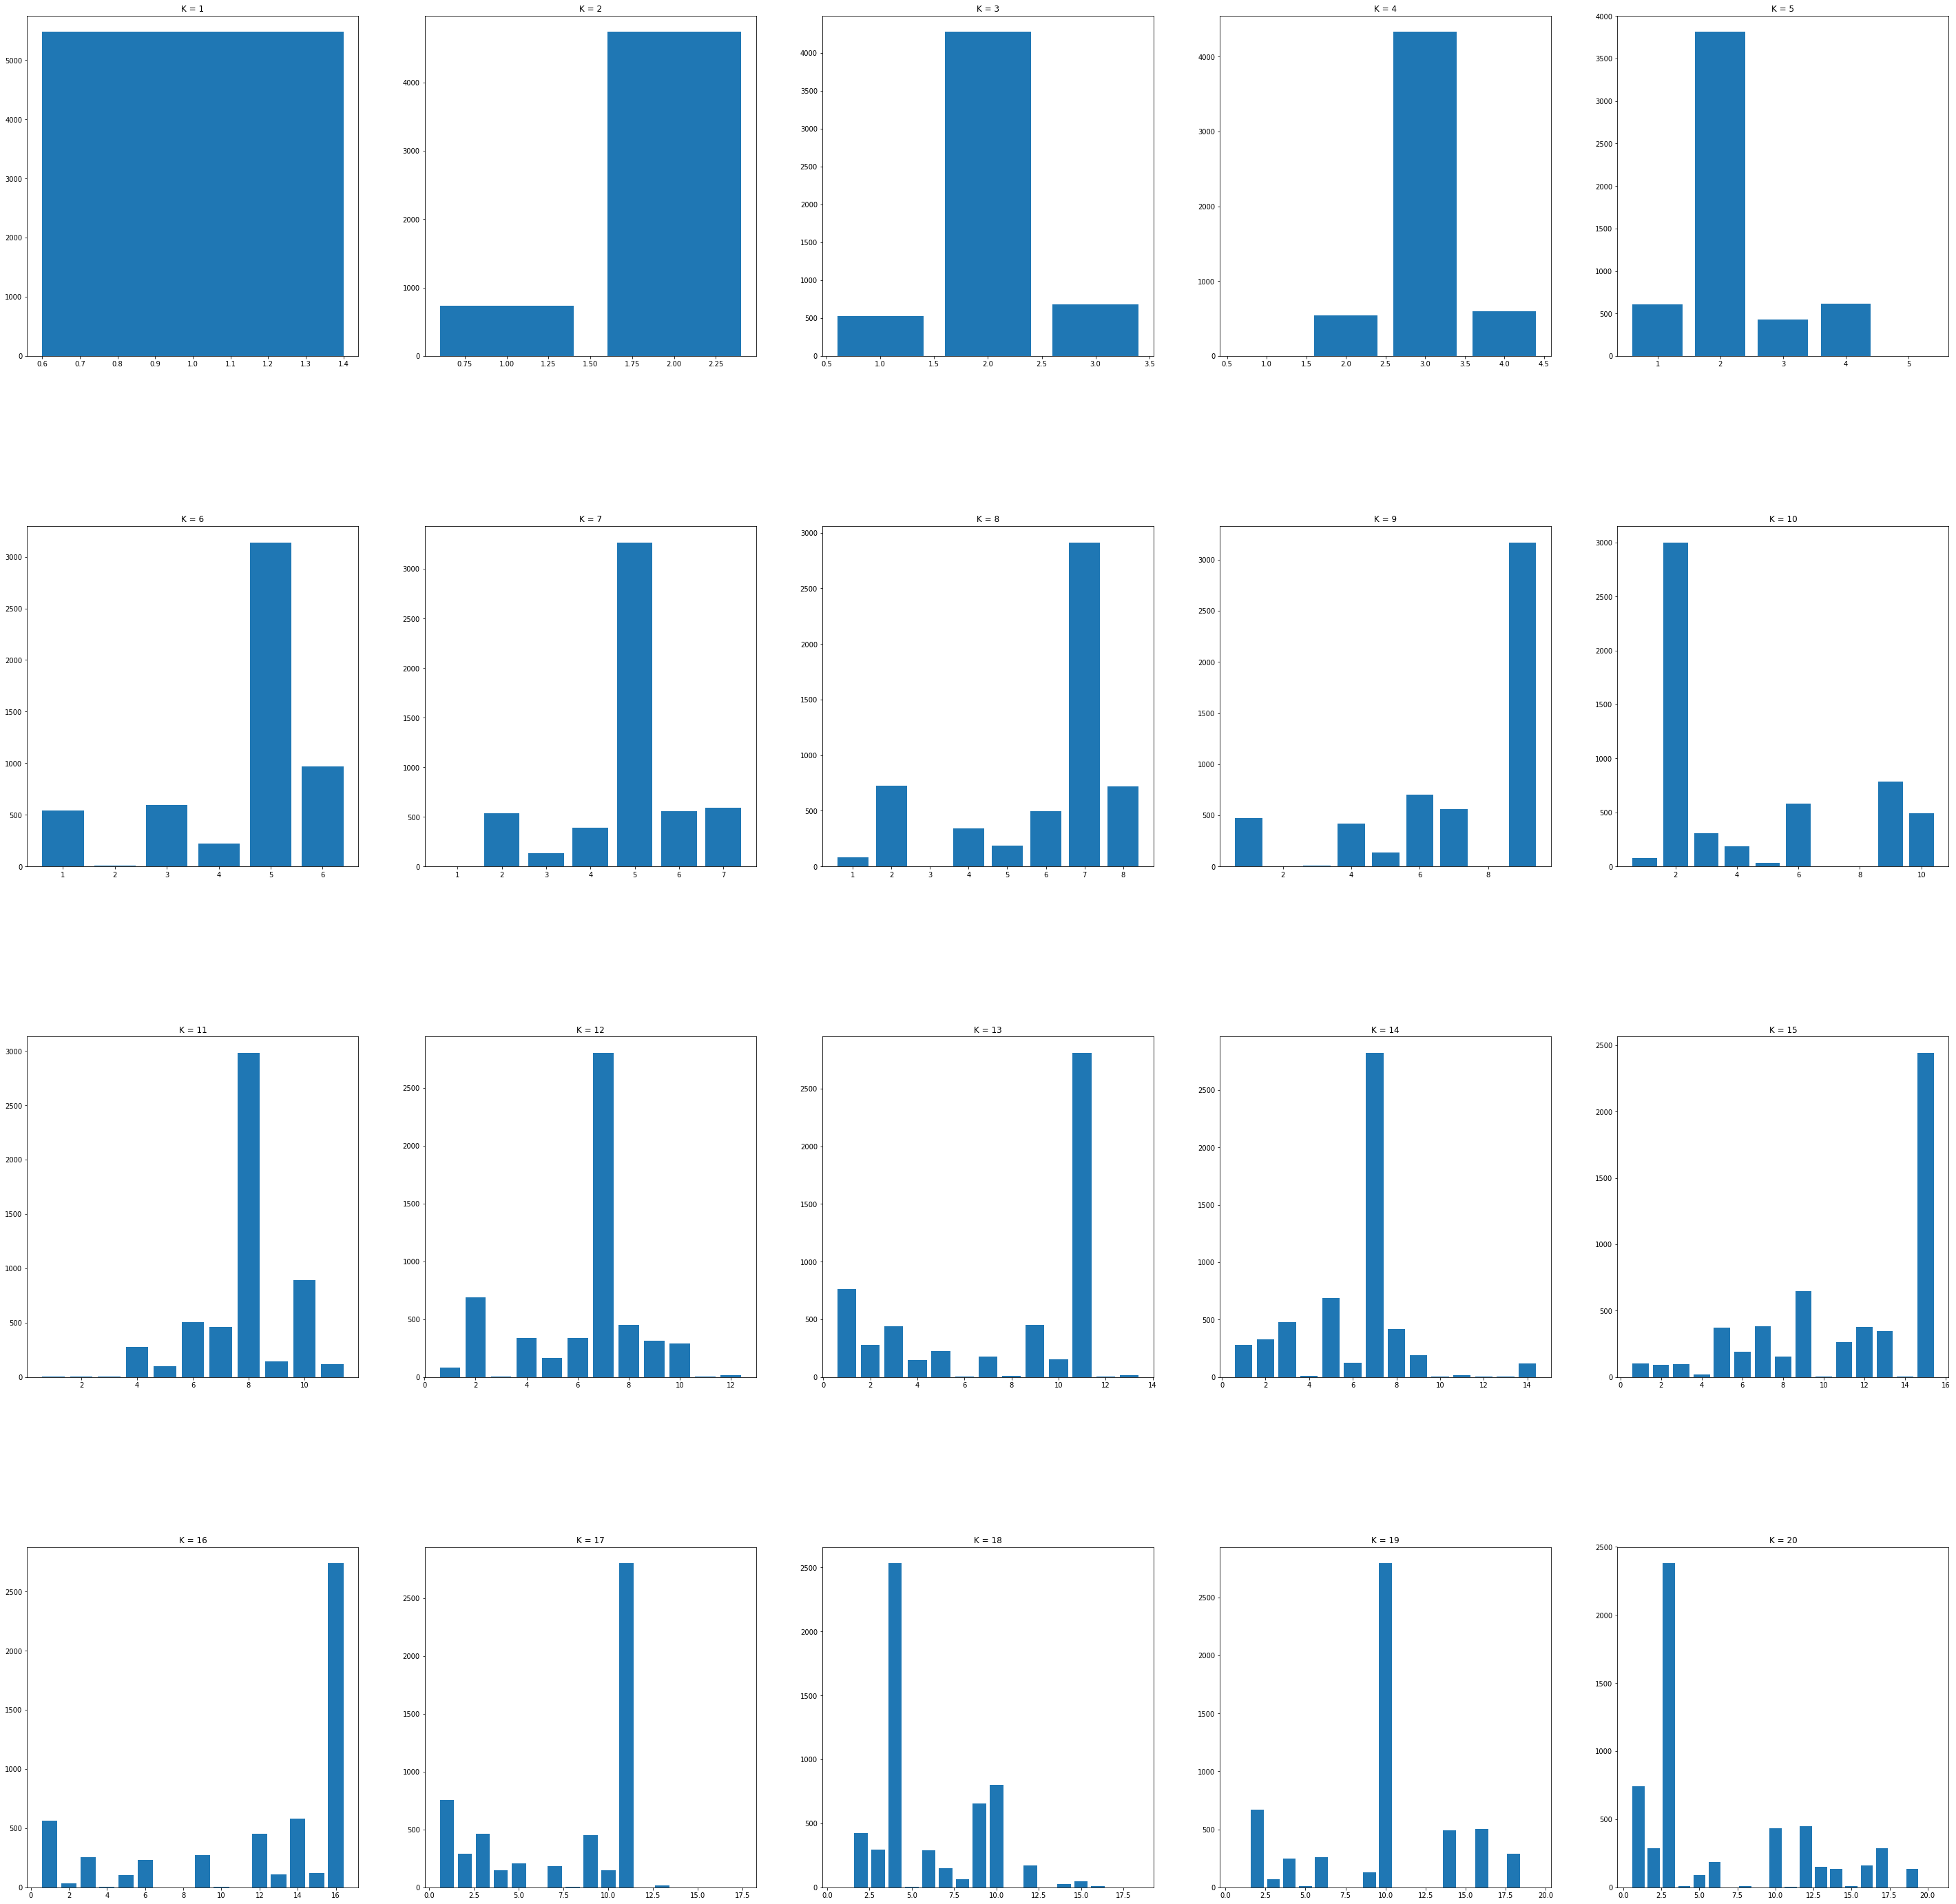

In [75]:
elbowNumTerm = 3
plot_outcome(20,clusterDistributionList,inertiaList,elbowNumTerm)

### Clustering and find 10 representative data in each cluster

In [86]:
clusterNum = elbowNumTerm
kmeans = KMeans(n_clusters = clusterNum, random_state=0).fit(science2kworddoc)
for ind in range(clusterNum):
    find_10_nearest_data(kmeans,science2kworddoc,termList,ind)

For cluster 1 \\
  \begin{itemize}
\item  fig

\item  cells

\item  usa

\item  found

\item  cell

\item  human

\item  known

\item  form

\item  analysis

\item  reports

\end{itemize}
For cluster 2 \\
  \begin{itemize}
\item  research

\item  years

\item  new

\item  see

\item  like

\item  early

\item  institute

\item  work

\item  university

\item  department

\end{itemize}
For cluster 3 \\
  \begin{itemize}
\item  system

\item  number

\item  study

\item  studies

\item  long

\item  time

\item  evidence

\item  important

\item  region

\item  surface

\end{itemize}
